In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/JP/Downloads/womens-ecommerce-clothing-reviews/clothing_review.csv",index_col=False)

In [2]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
df.shape
df['Title']=df['Title'].fillna(' ')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df=df.dropna()
df=df.reset_index()

In [6]:
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df['Review']=df['Title']+df['Review Text']

In [8]:
df.head(2)

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...


In [9]:
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_lg', parse=True, tag=True,)

In [10]:
txt = 'some major deign flaws'
doc = nlp(txt)
spacy.displacy.render(doc,style='dep',jupyter=True)

In [11]:
competitors = ['Flipkart','Ajio','Reliance Trends','Myntra','Koovs.com']

In [12]:
import re
aspect_terms = []
comp_terms = []
easpect_terms = []
ecomp_terms = []
enemy = []
for x in tqdm(range(len(df['Review']))):
    amod_pairs = []
    advmod_pairs = []
    compound_pairs = []
    xcomp_pairs = []
    neg_pairs = []
    eamod_pairs = []
    eadvmod_pairs = []
    ecompound_pairs = []
    eneg_pairs = []
    excomp_pairs = []
    enemlist = []
    if len(str(df['Review'][x])) != 0:
        lines = str(df['Review'][x]).replace('*',' ').replace('-',' ').replace('so ',' ').replace('be ',' ').replace('are ',' ').replace('just ',' ').replace('get ','').replace('were ',' ').replace('When ','').replace('when ','').replace('again ',' ').replace('where ','').replace('how ',' ').replace('has ',' ').replace('Here ',' ').replace('here ',' ').replace('now ',' ').replace('see ',' ').replace('why ',' ').split('.')       
        for line in lines:
            enem_list = []
            for eny in competitors:
                enem = re.search(eny,line)
                if enem is not None:
                    enem_list.append(enem.group())
            if len(enem_list)==0:
                doc = nlp(line)
                str1=''
                str2=''
                for token in doc:
                    if token.pos_ is 'NOUN':
                        for j in token.lefts:
                            if j.dep_ == 'compound':
                                compound_pairs.append((j.text+' '+token.text,token.text))
                            if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                str1 = j.text+' '+token.text
                                amod_pairs.append(j.text+' '+token.text)
                                for k in j.lefts:
                                    if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                        str2 = k.text+' '+j.text+' '+token.text
                                        amod_pairs.append(k.text+' '+j.text+' '+token.text)
                                mtch = re.search(re.escape(str1),re.escape(str2))
                                if mtch is not None:
                                    amod_pairs.remove(str1)
                    if token.pos_ is 'VERB':
                        for j in token.lefts:
                            if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                advmod_pairs.append(j.text+' '+token.text)
                            if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                neg_pairs.append(j.text+' '+token.text)
                        for j in token.rights:
                            if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                advmod_pairs.append(token.text+' '+j.text)
                    if token.pos_ is 'ADJ':
                        for j,h in zip(token.rights,token.lefts):
                            if j.dep_ is 'xcomp' and h.dep_ is not 'neg':
                                for k in j.lefts:
                                    if k.dep_ is 'aux':
                                        xcomp_pairs.append(token.text+' '+k.text+' '+j.text)
                            elif j.dep_ is 'xcomp' and h.dep_ is 'neg':
                                if k.dep_ is 'aux':
                                        neg_pairs.append(h.text +' '+token.text+' '+k.text+' '+j.text)
            
            else:
                enemlist.append(enem_list)
                doc = nlp(line)
                str1=''
                str2=''
                for token in doc:
                    if token.pos_ is 'NOUN':
                        for j in token.lefts:
                            if j.dep_ == 'compound':
                                ecompound_pairs.append((j.text+' '+token.text,token.text))
                            if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                str1 = j.text+' '+token.text
                                eamod_pairs.append(j.text+' '+token.text)
                                for k in j.lefts:
                                    if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                        str2 = k.text+' '+j.text+' '+token.text
                                        eamod_pairs.append(k.text+' '+j.text+' '+token.text)
                                mtch = re.search(re.escape(str1),re.escape(str2))
                                if mtch is not None:
                                    eamod_pairs.remove(str1)
                    if token.pos_ is 'VERB':
                        for j in token.lefts:
                            if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                eadvmod_pairs.append(j.text+' '+token.text)
                            if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                eneg_pairs.append(j.text+' '+token.text)
                        for j in token.rights:
                            if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                eadvmod_pairs.append(token.text+' '+j.text)
                    if token.pos_ is 'ADJ':
                        for j in token.rights:
                            if j.dep_ is 'xcomp':
                                for k in j.lefts:
                                    if k.dep_ is 'aux':
                                        excomp_pairs.append(token.text+' '+k.text+' '+j.text)
        pairs = list(set(amod_pairs+advmod_pairs+neg_pairs+xcomp_pairs))
        epairs = list(set(eamod_pairs+eadvmod_pairs+eneg_pairs+excomp_pairs))
        for i in range(len(pairs)):
            if len(compound_pairs)!=0:
                for comp in compound_pairs:
                    mtch = re.search(re.escape(comp[1]),re.escape(pairs[i]))
                    if mtch is not None:
                        pairs[i] = pairs[i].replace(mtch.group(),comp[0])
        for i in range(len(epairs)):
            if len(ecompound_pairs)!=0:
                for comp in ecompound_pairs:
                    mtch = re.search(re.escape(comp[1]),re.escape(epairs[i]))
                    if mtch is not None:
                        epairs[i] = epairs[i].replace(mtch.group(),comp[0])
            
    aspect_terms.append(pairs)
    comp_terms.append(compound_pairs)
    easpect_terms.append(epairs)
    ecomp_terms.append(ecompound_pairs)
    enemy.append(enemlist)
df['compound_nouns'] = comp_terms
df['aspect_keywords'] = aspect_terms
df['competition'] = enemy
df['competition_comp_nouns'] = ecomp_terms
df['competition_aspects'] = easpect_terms
df.head()

100%|████████████████████████████████████████████████████████████████████████████| 22628/22628 [18:49<00:00, 20.03it/s]


,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,competition,competition_comp_nouns,competition_aspects
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],[],[],[]
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",[],[],[]
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",[],[],[]
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",[],[],[]
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",[],[],[]


In [13]:
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,competition,competition_comp_nouns,competition_aspects
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],[],[],[]
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",[],[],[]
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",[],[],[]
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",[],[],[]
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",[],[],[]


In [14]:
df['aspect_keywords'].count()

22628

In [15]:
df.drop(['competition', 'competition_comp_nouns','competition_aspects'], axis=1,inplace=True)
df

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[]
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]"
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,..."
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]"
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22623,23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,Great dress for many occasionsI was very happy...,"[(color combo, combo)]","[flattering cut, very flattering cut, great pr..."
22624,23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,Wish it was made of cottonIt reminds me of mat...,"[(maternity clothes, clothes)]","[nice sleeves, shiny material, soft material, ..."
22625,23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"Cute, but see throughThis fit well, but the to...",[],"[order online, different fabric, never worked]"
22626,23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"Very cute dress, perfect for summer parties an...","[(summer parties, parties), (side note, note),...","[much cheaper t, cute dress, Very cute dress, ..."


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [17]:
import operator
sentiment = []
for i in range(len(df)):
    score_dict={'pos':0,'neg':0,'neu':0}
    if len(df['aspect_keywords'][i])!=0: 
        for aspects in df['aspect_keywords'][i]:
            sent = analyser.polarity_scores(aspects)
            score_dict['neg'] += sent['neg']
            score_dict['pos'] += sent['pos']
        #score_dict['neu'] += sent['neu']
        sentiment.append(max(score_dict.items(), key=operator.itemgetter(1))[0])
    else:
        sentiment.append('NaN')
df['sentiment'] = sentiment
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,sentiment
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],NaN
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",pos
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",pos
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",pos
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",pos


In [18]:
df['sentiment'].unique()

array(['NaN', 'pos', 'neg'], dtype=object)

In [19]:
int_sent = []
for sent in df['sentiment']:
    if sent is 'NaN':
        int_sent.append('NaN')
    elif sent is 'pos':
        int_sent.append('1')
    else:
        int_sent.append('0')
df['int_sent'] = int_sent
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,sentiment,int_sent
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],NaN,NaN
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",pos,1
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",pos,1
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",pos,1
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",pos,1


In [20]:
import math
pos = []
for i in range(len(df)):
    if not math.isnan(df['Rating'][i]):
        if int(df['Rating'][i])>3:
            pos.append('1')
        else:
            pos.append('0')
    else:
        pos.append('0')
df['Positive Review'] = pos
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,sentiment,int_sent,Positive Review
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],NaN,NaN,1
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",pos,1,1
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",pos,1,0
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",pos,1,1
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",pos,1,1


In [21]:
d = {'sent':df['Positive Review'],'sent_pred':df['int_sent']}
metric_df = pd.DataFrame(data=d)
metric_df.head()

,sent,sent_pred
0,1,NaN
1,1,1
2,0,1
3,1,1
4,1,1


In [22]:
len(metric_df.sent)

22628

In [23]:
metric_df = metric_df[metric_df.sent_pred != 'NaN']
len(metric_df.sent)

21522

In [24]:
from sklearn.metrics import accuracy_score,auc,f1_score,recall_score,precision_score
print('accuracy')
print(accuracy_score(metric_df.sent, metric_df.sent_pred))
print('f1 score')
print(f1_score(metric_df.sent, metric_df.sent_pred,pos_label='1'))
print('recall')
print(recall_score(metric_df.sent, metric_df.sent_pred,pos_label='1'))
print('precision')
print(precision_score(metric_df.sent, metric_df.sent_pred,pos_label='1'))

accuracy
0.7750673729207322
f1 score
0.8674533855378803
recall
0.95387487204191
precision
0.7953906406909018


In [25]:
import operator
sentiment = []
for i in range(len(df)):
    score_dict={'pos':0,'neg':0,'neu':0}
    if len(df['Review'][i])!=0: 
        for aspects in df['Review'][i]:
            sent = analyser.polarity_scores(aspects)
            score_dict['neg'] += sent['neg']
            score_dict['pos'] += sent['pos']
        #score_dict['neu'] += sent['neu']
        sentiment.append(max(score_dict.items(), key=operator.itemgetter(1))[0])
    else:
        sentiment.append('NaN')
df['sentiment_review'] = sentiment
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,sentiment,int_sent,Positive Review,sentiment_review
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],NaN,NaN,1,pos
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",pos,1,1,pos
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",pos,1,0,pos
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",pos,1,1,pos
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",pos,1,1,pos


In [26]:
for i in range(len(df)):
    if df['sentiment'][i]=='NaN':
        df['sentiment'][i]=df['sentiment_review'][i]

C:\Users\JP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df.head()

,index,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,compound_nouns,aspect_keywords,sentiment,int_sent,Positive Review,sentiment_review
0,0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,[],[],pos,NaN,1,pos
1,1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,[],"[would definitely, never ordered]",pos,1,1,pos
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"[(design flaw, flaw)]","[high hopes, usual size, such hopes, top half,...",pos,1,0,pos
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","[(buy!I love, love)]","[favorite buy!I love, great compliments]",pos,1,1,pos
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,[],"[adjustable front, perfect length, Flattering ...",pos,1,1,pos


In [28]:
df['sentiment'].unique()

array(['pos', 'neg'], dtype=object)

In [29]:
df.to_csv('F:/AMRITA MTECH/Datascience for NLP/absa.csv')

In [30]:
df_new=df.filter(['Clothing ID','Age','Rating','Review','Division Name','aspect_keywords','sentiment'], axis=1)

In [31]:
df_new.head()

,Clothing ID,Age,Rating,Review,Division Name,aspect_keywords,sentiment
0,767,33,4,Absolutely wonderful - silky and sexy and com...,Initmates,[],pos
1,1080,34,5,Love this dress! it's sooo pretty. i happen...,General,"[would definitely, never ordered]",pos
2,1077,60,3,Some major design flawsI had such high hopes f...,General,"[high hopes, usual size, such hopes, top half,...",pos
3,1049,50,5,"My favorite buy!I love, love, love this jumpsu...",General Petite,"[favorite buy!I love, great compliments]",pos
4,847,47,5,Flattering shirtThis shirt is very flattering ...,General,"[adjustable front, perfect length, Flattering ...",pos


In [32]:
df_new.shape

(22628, 7)

In [33]:
n=(df[df['sentiment']=='neg'])

In [34]:
n.shape

(1606, 19)

In [35]:
p=(df[df['sentiment']=='pos'])

In [36]:
p.shape

(21022, 19)

In [37]:
count=[1606,21022]

In [38]:
df['sentiment_review'].unique()

array(['pos'], dtype=object)

Text(0.5,1,'Overall sentiment over the product')

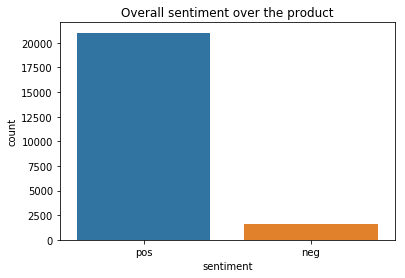

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.sentiment)
plt.title('Overall sentiment over the product')

In [ ]:
df_new.to_csv('F:/AMRITA MTECH/Datascience for NLP/absa_refined_latest.csv')